# Neuron networks from scratch in Python
References: http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20G/CSE%20%20IT%20AIDS%20ML/Neural%20Network.pdf

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

## Chapter 4: Activation Functions

### 

### 4.1 ReLU activation function 


In [35]:
# Python

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

def ReLU(inputs):
    return [max(0, x) for x in inputs]

print(ReLU(inputs))

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [36]:
# Numpy

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

def ReLU(inputs):
    return np.maximum(0, inputs)

print(ReLU(inputs))

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [37]:
class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

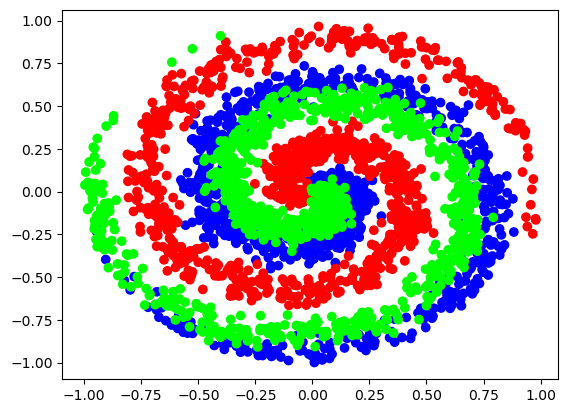

In [38]:
X, y = spiral_data(samples=1000, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [39]:
X.shape

(3000, 2)

In [40]:
dense1 = Dense(2, 30)
activation1 = ReLU()

dense1.forward(X)
activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.27860940e-05 3.24538587e-06 0.00000000e+00 0.00000000e+00
  4.75401384e-06 4.97514793e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.69513587e-05 0.00000000e+00 2.23193183e-05
  5.44745899e-06 1.20601806e-06 0.00000000e+00 1.00627576e-05
  0.00000000e+00 2.11222196e-05 7.70536360e-07 0.00000000e+00
  0.00000000e+00 1.03794064e-05 0.00000000e+00 5.05966545e-06
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.07530986e-05
  0.00000000e+00 2.87170474e-06]
 [3.24439716e-05 9.22672734e-06 0.00000000e+00 0.00000000e+00
  1.

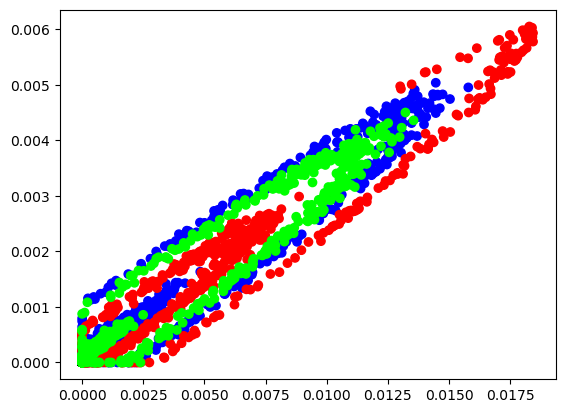

In [41]:
plt.scatter(activation1.output[:,0], activation1.output[:,1], c=y, cmap='brg')

### 4.2 Softmax activation function

In [42]:
class Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        prob = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = prob

In [43]:
dense1 = Dense(2, 100)
activation1 = ReLU()
dense2 = Dense(100, 3)
activation2 = Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

predictions = np.argmax(activation2.output, axis=1)

[[0.33333334 0.33333334 0.33333334]
 [0.33333313 0.33333325 0.3333336 ]
 [0.33333305 0.3333331  0.33333385]
 [0.33333334 0.33333278 0.3333339 ]
 [0.33333322 0.3333325  0.33333427]]


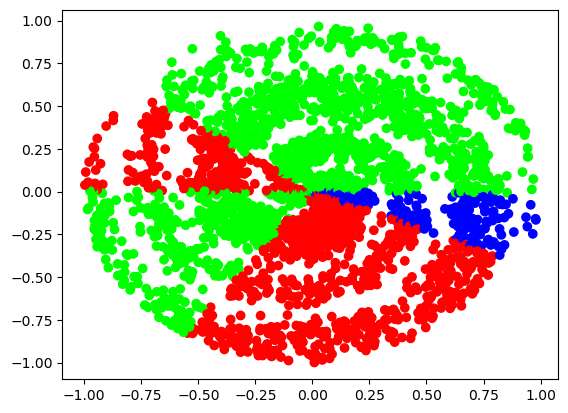

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='brg')
plt.show()